In [8]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [3]:
def read_sensor_data(file_prefix, num_sensors=15):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f'data/harmonized/{file_prefix}{i:02d}.csv'
        sensor_df = pd.read_csv(filename)
        sensor_dataframes.append(sensor_df)
    return sensor_dataframes

sensor_dataframes = read_sensor_data('Indoor')

In [5]:
def calculate_unique_days(sensor_dataframes):
    days_count = {}
    for i, df in enumerate(sensor_dataframes, start=1):
        df['Timestamp_Local'] = pd.to_datetime(df['Timestamp_Local'])

        # Extract the date and count unique dates
        unique_days = df['Timestamp_Local'].dt.date.nunique()
        days_count[f"Sensor {i}"] = unique_days
    return days_count

# Calculate number of unique days for each sensor
days_count = calculate_unique_days(sensor_dataframes)

# Display the results
for sensor, count in days_count.items():
    print(f"{sensor} has {count} unique days.")


Sensor 1 has 55 unique days.
Sensor 2 has 142 unique days.
Sensor 3 has 125 unique days.
Sensor 4 has 100 unique days.
Sensor 5 has 120 unique days.
Sensor 6 has 109 unique days.
Sensor 7 has 129 unique days.
Sensor 8 has 118 unique days.
Sensor 9 has 122 unique days.
Sensor 10 has 83 unique days.
Sensor 11 has 96 unique days.
Sensor 12 has 128 unique days.
Sensor 13 has 86 unique days.
Sensor 14 has 82 unique days.
Sensor 15 has 113 unique days.


In [23]:
# Urban, Rural, and Semi-Urban sensors
urban_sensors = [7, 8, 9, 11, 14]
rural_sensors = [2, 4, 5, 6, 10]
semi_urban_sensors = [1, 3, 12, 13, 15]

## Zoomed 1000

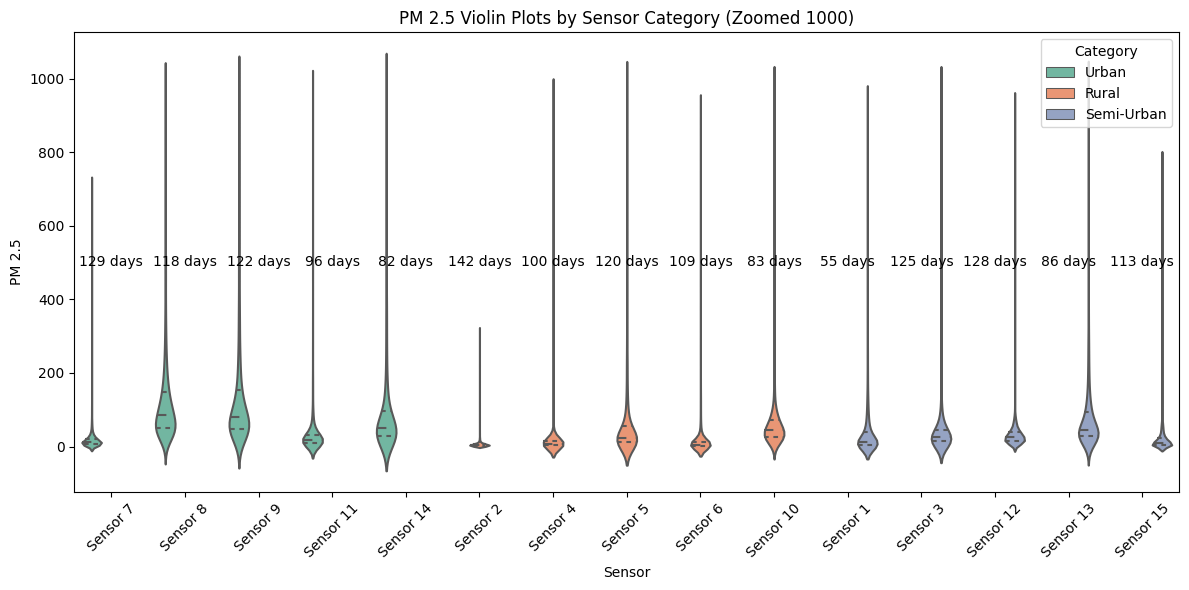

In [29]:
# Function to plot PM2.5 violin plots using the already calculated days_count
def plot_pm25_violin(sensor_dataframes, days_count):
    # Create a list for all sensor data, grouped by category
    all_data = []
    for i, df in enumerate(sensor_dataframes, start=1):
        # Extract the sensor category
        if i in urban_sensors:
            category = 'Urban'
        elif i in rural_sensors:
            category = 'Rural'
        else:
            category = 'Semi-Urban'
        
        # Create a new column with sensor category for plotting
        df['Category'] = category
        df['Sensor'] = f"Sensor {i}"
        
        # Remove values greater than 1000 in the 'PM 2.5' column
        df_filtered = df[df['PM2.5'] <= 1000]
        
        # Add filtered data to the list
        if 'PM2.5' in df_filtered.columns:
            all_data.append(df_filtered[['Sensor', 'PM2.5', 'Category']])

    # Concatenate all the filtered data frames
    all_data_df = pd.concat(all_data, ignore_index=True)

    # Explicitly define the order of sensors (Urban, Rural, and Semi-Urban)
    sensor_order = (
        urban_sensors + rural_sensors + semi_urban_sensors
    )
    
    # Create the violin plot with the correct order for both categories and sensors
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(
        data=all_data_df, 
        x='Sensor', 
        y='PM2.5', 
        hue='Category', 
        inner="quart", 
        palette="Set2", 
        hue_order=['Urban', 'Rural', 'Semi-Urban'],
        order=[f'Sensor {sensor}' for sensor in sensor_order]  # Ensures sensor order
    )
    
    # Get the y-axis limits for proper annotation placement
    y_min, y_max = ax.get_ylim()
    
    # Annotate the unique days using the days_count dictionary and adjust positioning inside the violins
    for i, sensor in enumerate(sensor_order):
        # Get the unique days for each sensor from the days_count dictionary
        sensor_label = f"Sensor {sensor}"
        unique_days = days_count.get(sensor_label, 'N/A')  # Default to 'N/A' if not found
        
        # Positioning the annotation inside the violin plot (a little to the right of the box)
        ax.text(
            i, 
            (y_max + y_min) / 2,  # Place text vertically in the middle of the violin's range
            f'{unique_days} days', 
            horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=10, 
            color='black'
        )
    
    # Add title and labels
    ax.set_title('PM 2.5 Violin Plots by Sensor Category (Zoomed 1000)')
    ax.set_xlabel('Sensor')
    ax.set_ylabel('PM 2.5')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to avoid clipping of labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Assuming 'sensor_dataframes' and 'days_count' are already defined
# Plot the PM 2.5 violin plots using the days_count dictionary
plot_pm25_violin(sensor_dataframes, days_count)


## Zoomed 200

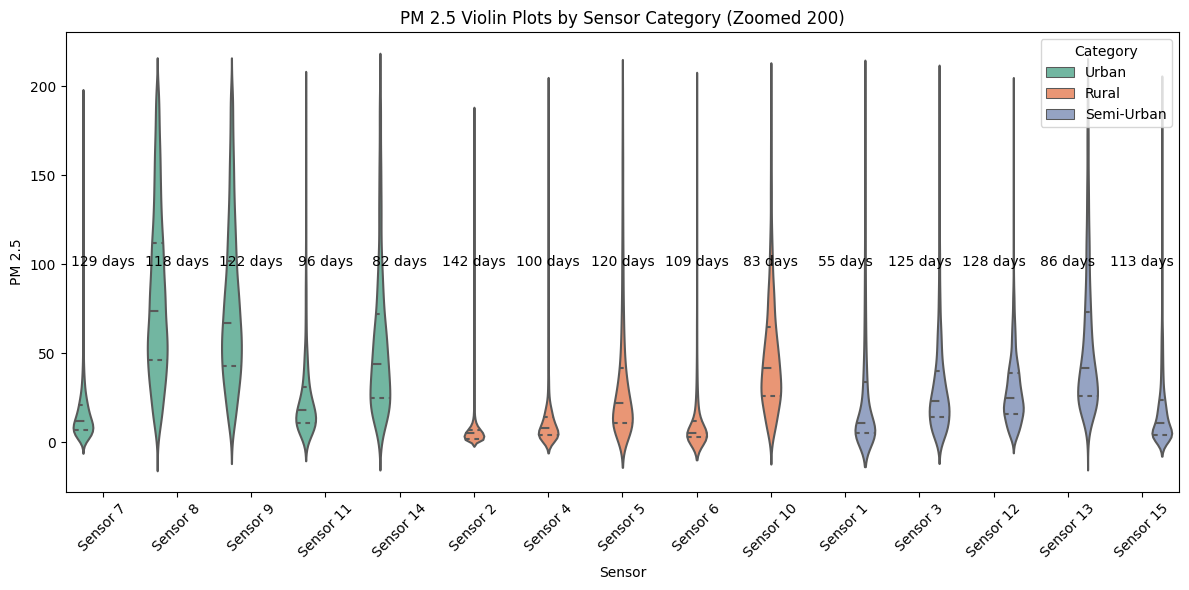

In [31]:
# Function to plot PM2.5 violin plots using the already calculated days_count
def plot_pm25_violin(sensor_dataframes, days_count):
    # Create a list for all sensor data, grouped by category
    all_data = []
    for i, df in enumerate(sensor_dataframes, start=1):
        # Extract the sensor category
        if i in urban_sensors:
            category = 'Urban'
        elif i in rural_sensors:
            category = 'Rural'
        else:
            category = 'Semi-Urban'
        
        # Create a new column with sensor category for plotting
        df['Category'] = category
        df['Sensor'] = f"Sensor {i}"
        
        # Remove values greater than 200 in the 'PM 2.5' column
        df_filtered = df[df['PM2.5'] <= 200]
        
        # Add filtered data to the list
        if 'PM2.5' in df_filtered.columns:
            all_data.append(df_filtered[['Sensor', 'PM2.5', 'Category']])

    # Concatenate all the filtered data frames
    all_data_df = pd.concat(all_data, ignore_index=True)

    # Explicitly define the order of sensors (Urban, Rural, and Semi-Urban)
    sensor_order = (
        urban_sensors + rural_sensors + semi_urban_sensors
    )
    
    # Create the violin plot with the correct order for both categories and sensors
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(
        data=all_data_df, 
        x='Sensor', 
        y='PM2.5', 
        hue='Category', 
        inner="quart", 
        palette="Set2", 
        hue_order=['Urban', 'Rural', 'Semi-Urban'],
        order=[f'Sensor {sensor}' for sensor in sensor_order]  # Ensures sensor order
    )
    
    # Get the y-axis limits for proper annotation placement
    y_min, y_max = ax.get_ylim()
    
    # Annotate the unique days using the days_count dictionary and adjust positioning inside the violins
    for i, sensor in enumerate(sensor_order):
        # Get the unique days for each sensor from the days_count dictionary
        sensor_label = f"Sensor {sensor}"
        unique_days = days_count.get(sensor_label, 'N/A')  # Default to 'N/A' if not found
        
        # Positioning the annotation inside the violin plot (a little to the right of the box)
        ax.text(
            i, 
            (y_max + y_min) / 2,  # Place text vertically in the middle of the violin's range
            f'{unique_days} days', 
            horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=10, 
            color='black'
        )
    
    # Add title and labels
    ax.set_title('PM 2.5 Violin Plots by Sensor Category (Zoomed 200)')
    ax.set_xlabel('Sensor')
    ax.set_ylabel('PM 2.5')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to avoid clipping of labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Assuming 'sensor_dataframes' and 'days_count' are already defined
# Plot the PM 2.5 violin plots using the days_count dictionary
plot_pm25_violin(sensor_dataframes, days_count)
